## ESTADÍSTICA APLICADA

Sesión 6 - 25 de Agosto

Francisco Humberto Villegas Reyna 1731722 Gpo043

## REPASO DE MCO

In [1]:
# BÁSICAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#especializada
import statsmodels.formula.api as smf

In [2]:
#DATOS
datos = pd.read_excel('modelolineal.xlsx')

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
datos

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21
5,6,24.436799,22
6,7,14.507928,19
7,8,16.013496,14
8,9,12.043514,3
9,10,6.808838,1


In [5]:
datos = datos[['X','Y']]

In [6]:
#ESTADISTICAS DESCRIPTIVAS
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


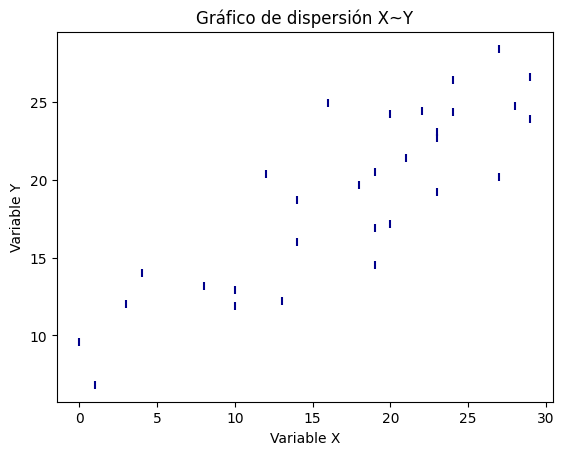

In [7]:
##gráfico de sispersion
plt.scatter(datos['X'], datos['Y'], marker='|', color='darkblue')
plt.title('Gráfico de dispersión X~Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

el gráfico muestra una relación lineal por lo que tiene sentido estimar un modelo de MCO (minimos cuadrados ordinarios)

 # Vamos a estimar:


 # $ Y= \beta_0 + \beta_1 X$

In [8]:
## 1 Especificar el modelo
reg0=smf.ols(formula='Y~X', data=datos)
## 2 Estimar el modelo
results0 = reg0.fit() 
## 3 Mostramos el modelo estimado
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        16:02:03   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

# Intercepto:
$ Pvalue < \alpha $ Rechazamos $H_0$, significa que el intercepto es distinto de cero estadísticamente hablado **"estadísticamente significativo"** con un valor de 8.96 ( coef intercept)

$"X"$ : $ Pvalue< \alpha $  Rechazamos $H_0$, significa que $"X"$ afecta a  $"Y"$.

En promedio, cuando $"X"$ aumenta $I$, $"Y"$ aumenta $0.5814$

MAD = Desviación absuluta media. $ MAD = \frac{1}{n} \sum |Y- \hat{Y}|$

MSD = Desviación cuadrática media. $ MSD = \frac{1}{n} \sum (Y- \hat{Y})^2$

MAPE= Error porcentual absoluto medio. $ MAPE = \frac{1}{n} \sum |\frac{Y- \hat{Y}}{Y}|$


In [9]:
## primero obtenemos el valor pronosticado
datos['Y_hat']= results0.predict(datos)

In [10]:
datos.head()
#valor real y valor pronosticado

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [11]:
#calcular el MAD
MAD0= (datos['Y']-datos['Y_hat']).abs().mean()
print("El MAD del modelo es:", MAD0.round(2))

El MAD del modelo es: 2.35


vamos a evaluar $ Y = \beta_0 + \beta_1 X + \beta_2 X^2$

In [12]:
## calcular la x cuadrada 
datos['X2'] = datos['X']**2

In [13]:
## 1 especificar
reg1= smf.ols(formula='Y~X+X2', data=datos)

## 2 estimar
results1 = reg1.fit()

## 3 mostrar
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        16:02:04   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [14]:
datos['Y_hat1']=results1.predict(datos)

In [15]:
MAD1=(datos['Y']-datos['Y_hat1']).abs().mean()

In [16]:
print(MAD0.round(3), MAD1.round(3))

2.354 2.355


El mejor modelo es del menor valor del MAD, eso significa que el modelo **$ Y = \beta_0 + \beta_1 X$** es el mejor modelo

## VALIDACIÓN CRUZADA

In [17]:
datos = pd.read_excel('modelolineal.xlsx')
datos=datos[['X','Y']]
datos

,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112
5,22,24.436799
6,19,14.507928
7,14,16.013496
8,3,12.043514
9,1,6.808838


In [18]:
datos['X2']=datos['X']**2


In [19]:
datos.head()

,X,Y,X2
0,23,19.246957,529
1,19,16.878501,361
2,27,20.187237,729
3,13,12.176789,169
4,21,21.420112,441


In [20]:
#conjuto entrenamiento y conjunto de prueba (80% y 20%)
#conjunto de entrenamiento
train_set = datos.iloc[:20]
#conjunto de evaluación (de prueba)
test_set =  datos.iloc[20:]

$Y =\beta_0 + \beta_1 X$

In [21]:
## estimar conjunto de entrenamiento
#   1
regm1= smf.ols(formula='Y~X', data=train_set)

#2
resultsm1=regm1.fit()



In [22]:
#pronosticar
test_set['Y_est1'] = resultsm1.predict(test_set)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4560\1312328223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_est1'] = resultsm1.predict(test_set)


In [23]:
test_set.head()

,X,Y,X2,Y_est1
20,0,9.544102,0,9.233587
21,20,24.230330,400,20.117395
22,24,26.417826,576,22.294157
23,23,23.066723,529,21.749966
24,8,13.145005,64,13.587110


In [26]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 991.0 kB/s eta 0:00:10
                                              0.1/9.2 MB 2.1 MB/s eta 0:00:05
     -                                        0.4/9.2 MB 3.0 MB/s eta 0:00:03
     --                                       0.6/9.2 MB 3.2 MB/s eta 0:00:03
     ---                                      0.7/9.2 MB 3.4 MB/s eta 0:00:03
     ---                                      0.8/9.2 MB 3.1 MB/s eta 0:00:03
     ----                                     1.0/9.2 MB 3.3 MB/s eta 0:00:03
     -----                                    1.3/9.2 MB 3.5 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.6 MB/s eta 0:00:03
     -------                                  1.7/9.2 MB 3.7 MB/s eta 0:00:03
     --------                                 1.9/9.2 MB 3.8 MB/s eta 0:00:02
     ---------                                2.1/9.2 MB 3.9 MB/s eta


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn.metrics import mean_absolute_error as MAD

In [28]:
MADm1 = MAD(test_set['Y'], test_set['Y_est1'])

In [31]:
MADm1.round(3)

2.108

 MODELO $ Y = \beta_0 + \beta_1 X + \beta_2 X^2$

In [32]:
#ESTIMAR
# 1
regm2 = smf.ols(formula='Y~X+X2', data= train_set)
# 2
resultsm2 = regm2.fit()



In [33]:
test_set['Y_estm2']=resultsm2.predict(test_set)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4560\1027217209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_estm2']=resultsm2.predict(test_set)


In [34]:
test_set.head()

,X,Y,X2,Y_est1,Y_estm2
20,0,9.544102,0,9.233587,8.207381
21,20,24.230330,400,20.117395,20.353727
22,24,26.417826,576,22.294157,22.246155
23,23,23.066723,529,21.749966,21.789824
24,8,13.145005,64,13.587110,13.602761


In [36]:
## CALCULAMOS MAD
MADm2= MAD(test_set['Y'], test_set['Y_estm2'])

In [37]:
MADm2.round(3)

2.334

In [47]:
print("VALIDACIÓN CRUZADA:","\n\nMAD modelo 1:",MADm1.round(3),"\nMAD modelo 2:", MADm2.round(3))

VALIDACIÓN CRUZADA: 

MAD modelo 1: 2.108 
MAD modelo 2: 2.334
